# Title: Classifying Invasive Ductal Carcinoma (Breast Cancer) Histology Images using Deep-learning Techniques

# 1.0 Introduction

# 1.1 Dataset 

For this study, breast histology images created by Simon Jegou and curated from Andrew Janowczyk's website were used for training, validation, and testing of our models. The dataset consists of 5547 images, each of which has three colour channels (red, green, and blue) and dimensions of 50 pixels in height and width. The images are set up in a four-dimensional array as seen in line 3, where the first dimension denotes the number of images, the second and third dimensions denote the size of each image, and the fourth dimension denotes the colour channels.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
X = np.load("X.npy")
y = np.load("Y.npy")

In [3]:
print(X.shape)

(5547, 50, 50, 3)


# 2.0 Exploratory Data Analysis  

First, we check the distribution of the data. From the pie chart in line 6, it's clear that we have balanced data, which means our positive invasive ductal carcinoma dataset is almost equal to the negative dataset. Additionally, we could see from the images in line 8 that there are significant differences between the colour distributions of positive and negative images. This suggests that colour information might work well for classifying these images.

In [4]:
print(format(np.sum(y==0)))

2759


In [5]:
print(format(np.sum(y==1)))

2788


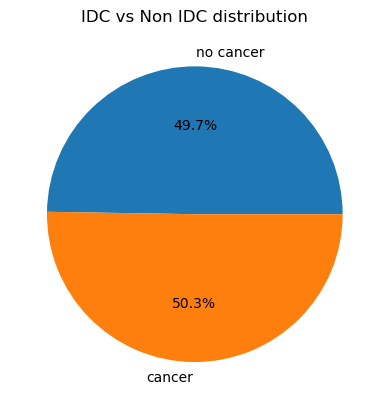

In [6]:
# Count the number of occurrences of each class label
counts = np.bincount(y)

plt.pie(counts, labels=['no cancer', 'cancer'], autopct='%1.1f%%')
plt.title('IDC vs Non IDC distribution')
plt.show()

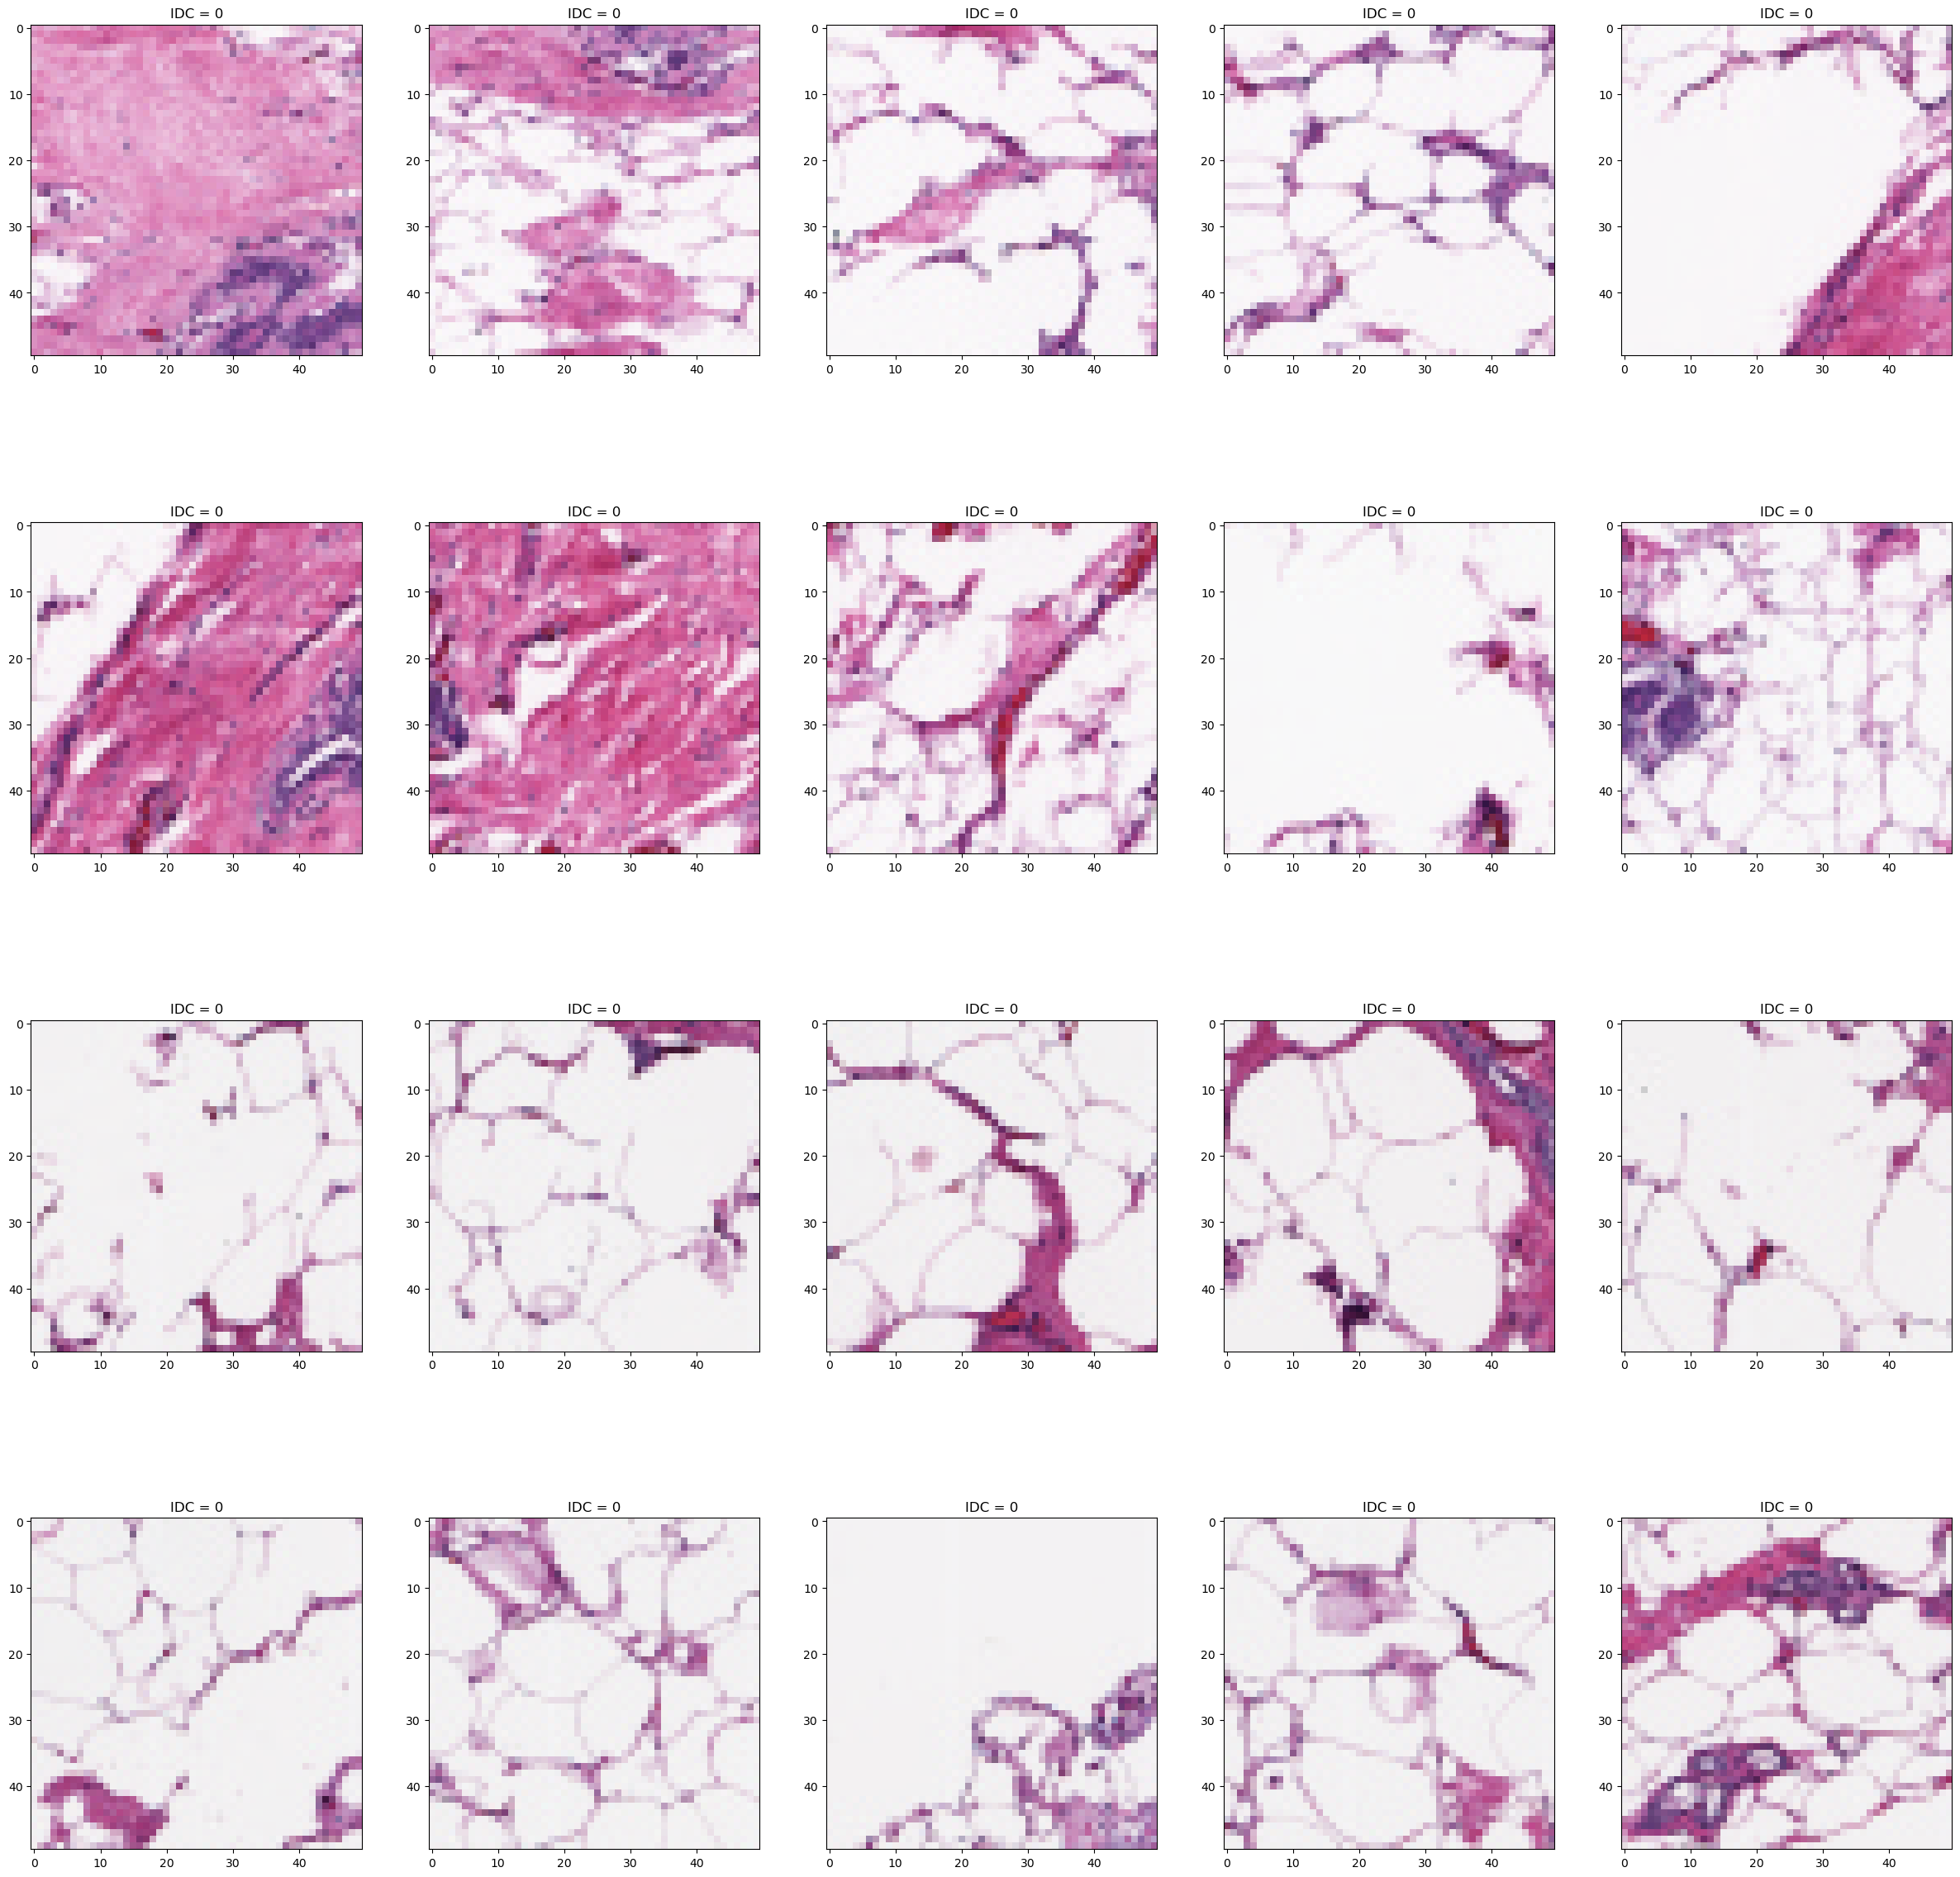

In [7]:
imgs_0 = X[y == 0] # 0 = no cancer
imgs_1 = X[y == 1] # 1 = cancer

plt.figure(figsize=(30,30))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.title('IDC = %d'%y[i])
    plt.imshow(X[i])

The above images shows the dimension of the dataset

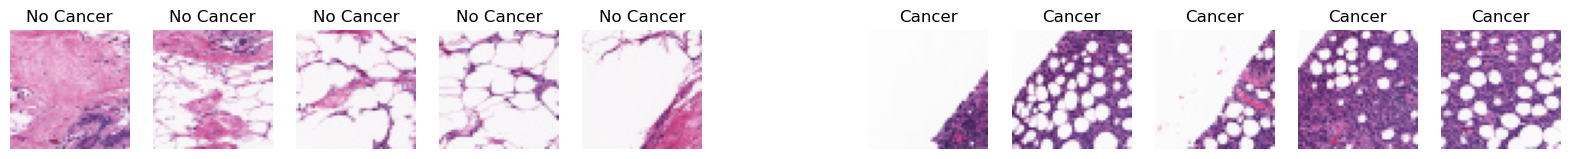

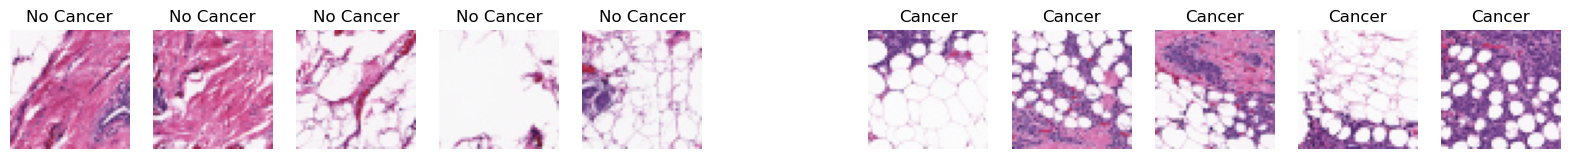

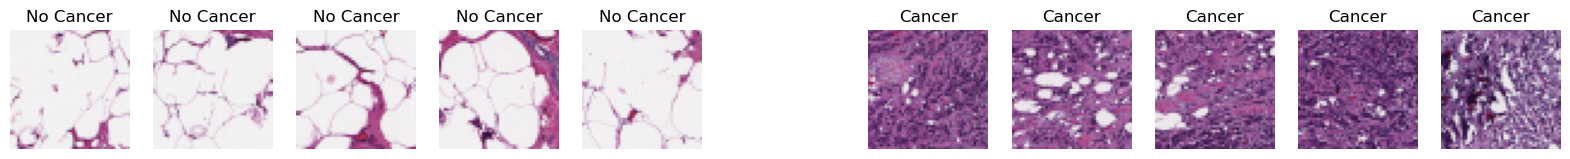

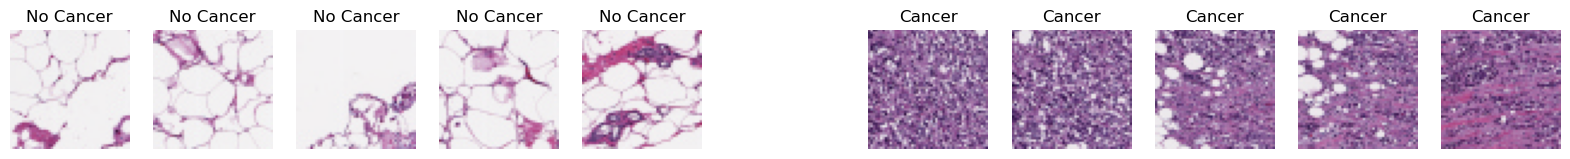

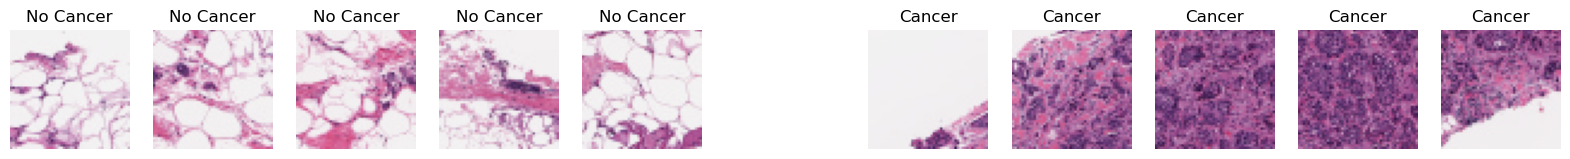

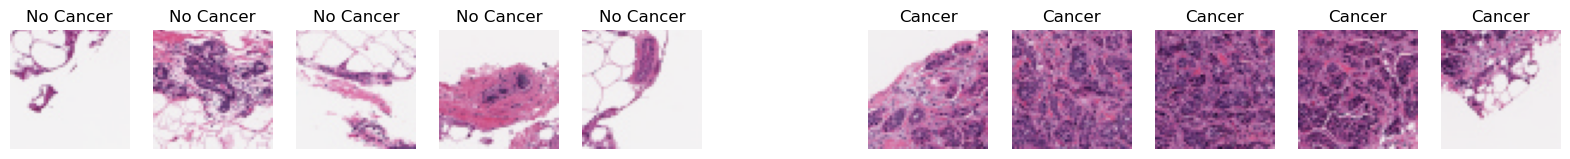

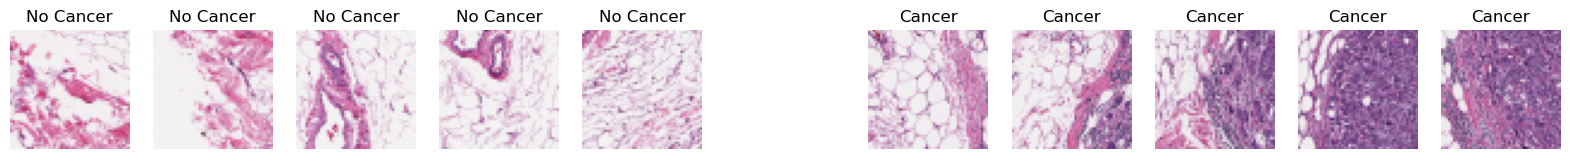

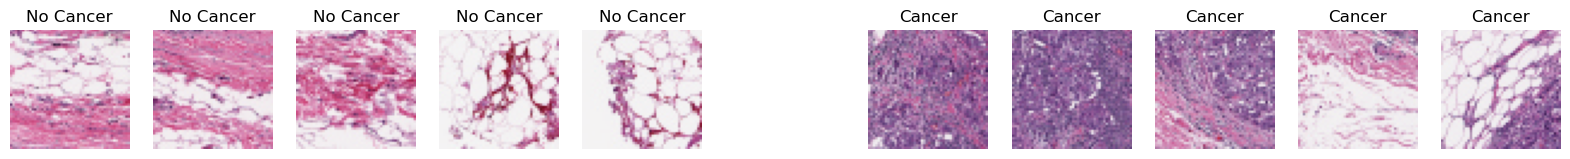

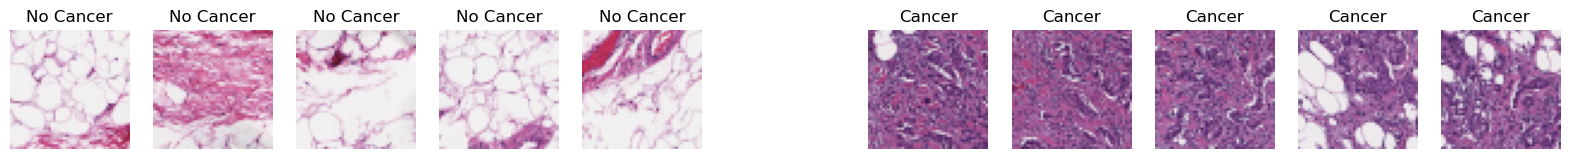

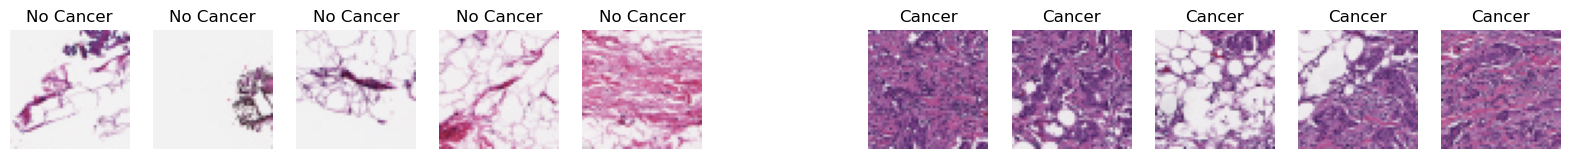

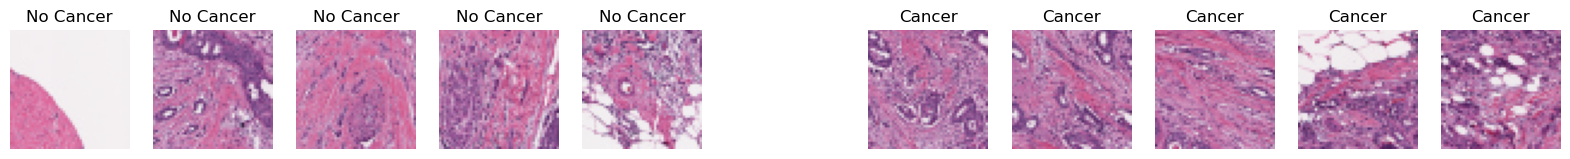

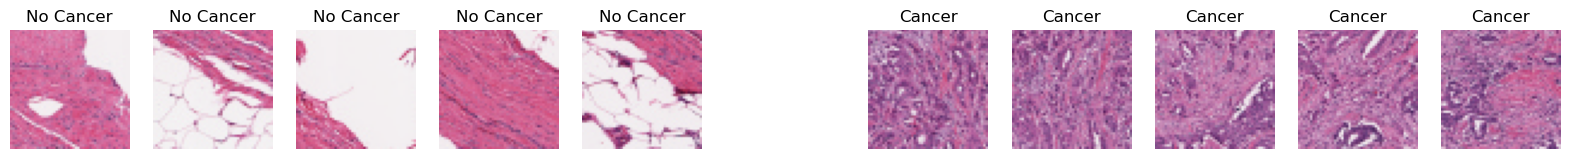

In [8]:
imgs0 = X[y==0] 
imgs1 = X[y==1] 

batch = 0

for row in range(12):
    plt.figure(figsize=(20, 10))
    for col in range(5):
        plt.subplot(1, 11, col+1)
        plt.imshow(imgs0[50*batch + 5*row+col])
        plt.axis('off')
        plt.title("No Cancer")

        plt.subplot(1, 11, col+7)
        plt.imshow(imgs1[50*batch + 5*row+col])
        plt.axis('off')
        plt.title("Cancer")
    plt.show()

# 3.1 Pre-processing 

Preprocessing of the data helps to convert it into a format that can be processed more quickly and efficiently, while data normalization is the process of organizing data in such a way that the results of using it are always unambiguous and as intended. In this study, image normalization has been applied in the preprocessing. 

The images are normalized by dividing them by 255 to ensure that all the values are between 0 and 1, which helps train the model faster and prevents it from falling into the vanishing and exploding gradients problem (Romano & Hernandez, 2019). After normalisation, the whole data set was split into train, Validation and test sets (80%, 10% and 10%, respectively) for each classification. 

As part of the preprocessing steps, we will be using the one hot encoding which will help in converting our categorical variable which is our class label into a format that may be fed into machine learning algorithms to improve prediction accuracy

In [9]:
Xnorm = X/255.0 # data normalisation 

In [10]:
print(Xnorm.min()) #to check for the minimum value, in this case the minimum value should be approximately 0

0.00784313725490196


In [11]:
print(Xnorm.max()) #to check for the maximum value which should be 1

1.0


In [12]:
# In this cell I will be spliting the normalised data into train and test set (80% and 20% respectively)
# The normalised dataset will be use for building our models

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Xnorm, y, test_size=0.2, random_state=2022)

In [13]:
# Split test set into validation and test sets (50% each)

X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=2022)

In [14]:
# In this cell I decided to check the shape of each of our train,validation and test set

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_val.shape)
print(y_val.shape)

(4437, 50, 50, 3)
(4437,)
(555, 50, 50, 3)
(555,)
(555, 50, 50, 3)
(555,)


In [15]:
# In this session we will be one-hot encoding the class label

from tensorflow.keras.utils import to_categorical

# one-hot encoding of the labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)

In [16]:
# In this session we use the shape function to check the number of classes on our y variable 

data_class = y_train.shape[1]
print(data_class)

2


# 3.0 Methodology
 

# 3.2 Convolutional Neural Network (ConvNet/CNN)

A Convolutional Neural Network (ConvNet/CNN) is a Deep Learning algorithm that can take in an input image, assign importance (learnable weights and biases) to various aspects/objects in the image, and be able to differentiate one from the other (Sumit Saha, 2018). 

The proposed CNN architecture is given in line 16 and it comprises three convolutional layers with 32, 64, and 128 filters, each followed by a MaxPooling2D layer with a pool size of (2,2). The activation function used in all the convolutional layers is ReLU (Rectified Linear Unit). Then, the output is flattened and passed through two dense layers, with 128 neurons in the first layer and 2 neurons in the final layer, using the sigmoid activation function. The model uses the binary cross-entropy loss function, the Adam optimizer, and the accuracy metric. 

Finally, the model summary is printed, showing the number of parameters in each layer and the total number of trainable parameters in the model.

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Dropout, MaxPooling2D, Flatten

# Define the input shape
input_shape = (50, 50, 3)

# Create the model
model = Sequential()

# Add convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten the output and add dense layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(data_class, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 48, 48, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 24, 24, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 22, 22, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 9, 9, 128)         73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 4, 4, 128)       

# 3.4 Hyper-Parameter

Hyperparameter optimization is the act of searching the space of possible configuration variables for a training algorithm to find a set of variables that allows the algorithm to achieve more desirable results (Bergstra et al., 2015). 

In this study we decided to split the data into a training set, validation set, and test set, and the training set was used to learn the model while the validation set is used to find the optimal hyperparameters

In [23]:
from tensorflow.keras.callbacks import EarlyStopping

callback = EarlyStopping(monitor='loss', patience=3)

seed = 2022
np.random.seed(seed)
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=64, callbacks=[callback])


print(len(history.history['loss']))

Epoch 1/20
70/70 [==============================] - 6s 78ms/step - loss: 0.6774 - accuracy: 0.5774 - val_loss: 0.6368 - val_accuracy: 0.6577
Epoch 2/20
70/70 [==============================] - 5s 66ms/step - loss: 0.6101 - accuracy: 0.6851 - val_loss: 0.5849 - val_accuracy: 0.7279
Epoch 3/20
70/70 [==============================] - 5s 65ms/step - loss: 0.5671 - accuracy: 0.7214 - val_loss: 0.5647 - val_accuracy: 0.7207
Epoch 4/20
70/70 [==============================] - 5s 66ms/step - loss: 0.5492 - accuracy: 0.7347 - val_loss: 0.5713 - val_accuracy: 0.7063
Epoch 5/20
70/70 [==============================] - 5s 68ms/step - loss: 0.5374 - accuracy: 0.7437 - val_loss: 0.5545 - val_accuracy: 0.7441
Epoch 6/20
70/70 [==============================] - 5s 69ms/step - loss: 0.5379 - accuracy: 0.7455 - val_loss: 0.5814 - val_accuracy: 0.6955
Epoch 7/20
70/70 [==============================] - 6s 87ms/step - loss: 0.5257 - accuracy: 0.7552 - val_loss: 0.5642 - val_accuracy: 0.7171
Epoch 8/20
70

In [24]:
test_loss, test_accuracy = model.evaluate(X_test,y_test)

18/18 [==============================] - 0s 8ms/step - loss: 0.5072 - accuracy: 0.7604


In [25]:
print("\nTest loss: {0:.2f}. Test accuracy: {1:.2f}%".format(test_loss, test_accuracy*100.))


Test loss: 0.51. Test accuracy: 76.04%


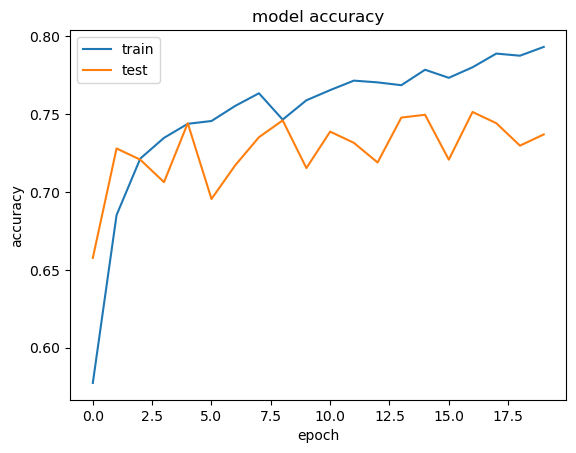

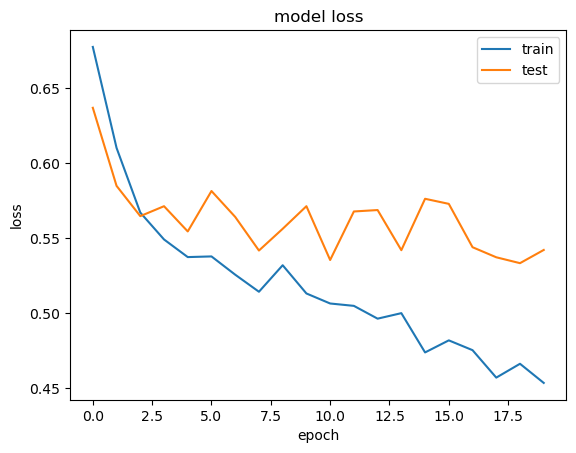

In [26]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# Deep Neural Network

A Deep Neural Network (DNN) is simply an artificial neural network with deep layers. The Deep layers in this context mean that the network has several layers stacked together for processing and learning from data. DNNs were originally inspired by neurobiology, particularly, the way humans learn to perceive and recognize physical things (baeldung, 2023).

The DNN is made up of many simple structures that form a stack. Almost everybody undertakes non-linear operations in this basic framework, which changes the scale of the data in another area and helps expose hidden features in the data (Ameh Joseph et al., 2022).  

In [30]:
# We will be building a Deep Neural Network with two hidden layer


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Create the DNN model
dnn_model = Sequential()

#Flatten the input
dnn_model.add(Flatten(input_shape = input_shape))

# Add dense layers
dnn_model.add(Dense(256, activation='relu'))
dnn_model.add(Dropout(0.5))
dnn_model.add(Dense(128, activation='relu'))
dnn_model.add(Dropout(0.5))
dnn_model.add(Dense(data_class, activation='softmax'))

# Compile the DNN model
dnn_model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

# Print the DNN model summary
dnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 7500)              0         
                                                                 
 dense_6 (Dense)             (None, 256)               1920256   
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 2)                 258       
                                                                 
Total params: 1,953,410
Trainable params: 1,953,410
No

In [34]:
from tensorflow.keras.callbacks import EarlyStopping

callback = EarlyStopping(monitor='loss', patience=2)

seed = 2022
np.random.seed(seed)
dnn_history = dnn_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=64, callbacks=[callback])


print(len(dnn_history.history['loss']))

Epoch 1/20
70/70 [==============================] - 1s 16ms/step - loss: 0.6931 - accuracy: 0.5076 - val_loss: 0.6938 - val_accuracy: 0.4793
Epoch 2/20
70/70 [==============================] - 1s 15ms/step - loss: 0.6931 - accuracy: 0.5076 - val_loss: 0.6939 - val_accuracy: 0.4793
Epoch 3/20
70/70 [==============================] - 1s 15ms/step - loss: 0.6931 - accuracy: 0.5076 - val_loss: 0.6940 - val_accuracy: 0.4793
Epoch 4/20
70/70 [==============================] - 1s 14ms/step - loss: 0.6931 - accuracy: 0.5076 - val_loss: 0.6938 - val_accuracy: 0.4793
4


In [35]:
dnn_test_loss, dnn_test_accuracy = dnn_model.evaluate(X_test,y_test)

18/18 [==============================] - 0s 8ms/step - loss: 0.6936 - accuracy: 0.4865


In [36]:
print("\nTest loss: {0:.2f}. Test accuracy: {1:.2f}%".format(dnn_test_loss, dnn_test_accuracy*100.))


Test loss: 0.69. Test accuracy: 48.65%


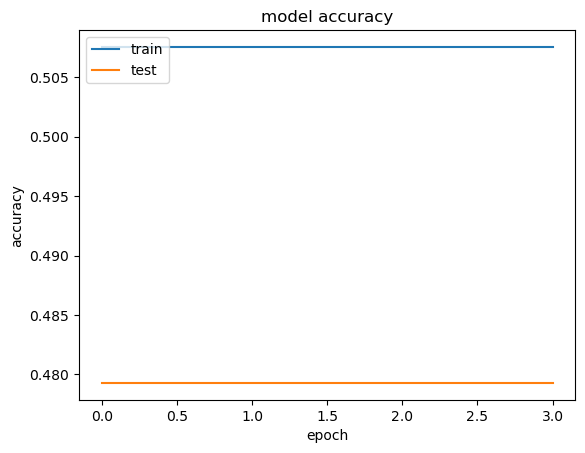

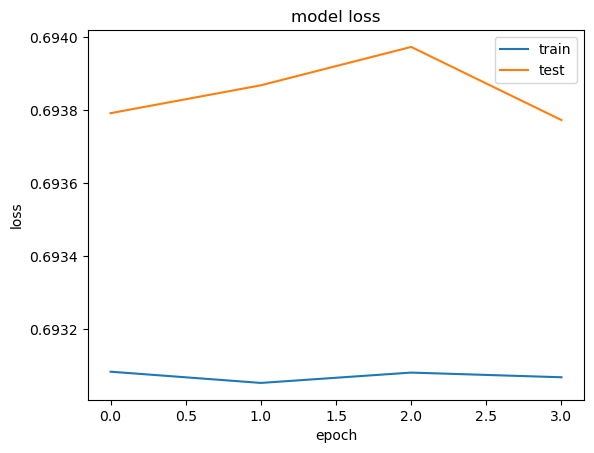

In [37]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(dnn_history.history['accuracy'])
plt.plot(dnn_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(dnn_history.history['loss'])
plt.plot(dnn_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# 4.0 Result and Evaluation 

In [45]:
# Precision and F1 Score for CNN

from sklearn.metrics import classification_report

directories = ['0 = no cancer', '1 = Cancer']

preds = model.predict(X_test)
print(preds.shape) # which means the predictions return in one-hot encoding format
preds = np.argmax(preds, axis=1)
print(preds.shape)
y_true = np.argmax(y_test, axis=1)
print(y_test.shape)
print(classification_report(y_true, preds, target_names=directories))

18/18 [==============================] - 0s 9ms/step
(555, 2)
(555,)
(555, 2)
               precision    recall  f1-score   support

0 = no cancer       0.75      0.80      0.77       285
   1 = Cancer       0.77      0.72      0.75       270

     accuracy                           0.76       555
    macro avg       0.76      0.76      0.76       555
 weighted avg       0.76      0.76      0.76       555



In [46]:
# Precision and F1 Score for DNN

from sklearn.metrics import classification_report

directories = ['0 = no cancer', '1 = Cancer']

dnn_preds = dnn_model.predict(X_test)

print(dnn_preds.shape) # which means the predictions return in one-hot encoding format

dnn_preds = np.argmax(dnn_preds, axis=1)

print(dnn_preds.shape)

dnn_y_true = np.argmax(y_test, axis=1)

print(y_test.shape)

print(classification_report(dnn_y_true, dnn_preds, target_names=directories, zero_division=1))

18/18 [==============================] - 0s 5ms/step
(555, 2)
(555,)
(555, 2)
               precision    recall  f1-score   support

0 = no cancer       1.00      0.00      0.00       285
   1 = Cancer       0.49      1.00      0.65       270

     accuracy                           0.49       555
    macro avg       0.74      0.50      0.33       555
 weighted avg       0.75      0.49      0.32       555



# 4.1 Precision 
 
Precision is the metric used to identify the correctness of classification. The formulae for calculation precision are as follows TP/TP+FP where TP is true positive, and FP is false positive. 

The greater the fraction, the higher the precision, which means the better the ability of the model to correctly classify the positive class. According to our findings, CNN precision for the no cancer class is 0.75, which means that 75% of all samples predicted to be cancer-free are actually cancer-free. The precision for the cancer class is 0.77, indicating that 77% of all samples predicted as cancer are actually cancer samples, whereas the DNN precision for the no cancer class is 1.00, indicating that 100% of all samples predicted as no cancer are actually no cancer samples. The precision for the cancer class is 0.49, indicating that 49% of all samples predicted as cancer are actually cancer samples.

When compared to the DNN model, the CNN model has higher precision in both classes. This suggests that the CNN model is more capable of making accurate positive predictions for both the no cancer and cancer classes.

# 4.2 F1-Score 

The F1 score is the harmonic mean of recall and precision, and thus balances their strengths. The formulas for calculation precision are as follows F1-score =2Precision  RecallPrecision + Recall .

It contributes to providing a more balanced assessment of the model's performance. Our research shows that the F1-score for CNN is 0.75 for the cancer class and 0.00 for the no cancer class for DNN, while these values are 0.77 and 0.65, respectively, for DNN.

In comparison to the CNN model, the DNN model has a higher F1 score for the cancer class. This suggests that the DNN model for predicting the cancer class achieves a better balance between precision and recall.

18/18 [==============================] - 0s 14ms/step


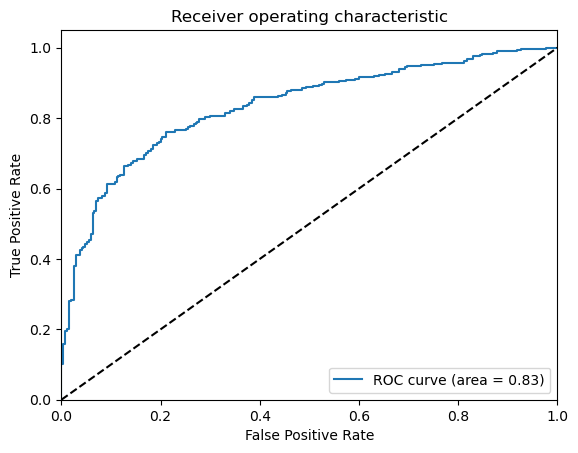

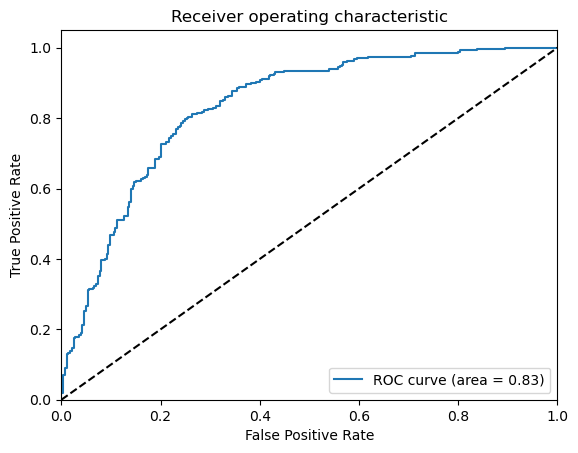

In [41]:
# Compute ROC curve and ROC area for each class for CNN

from sklearn.metrics import roc_curve, auc

y_score = model.predict(X_test) # get the prediction probabilities

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(data_class):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
# Plot of a ROC curve for a specific class

for i in range(data_class):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

18/18 [==============================] - 0s 5ms/step


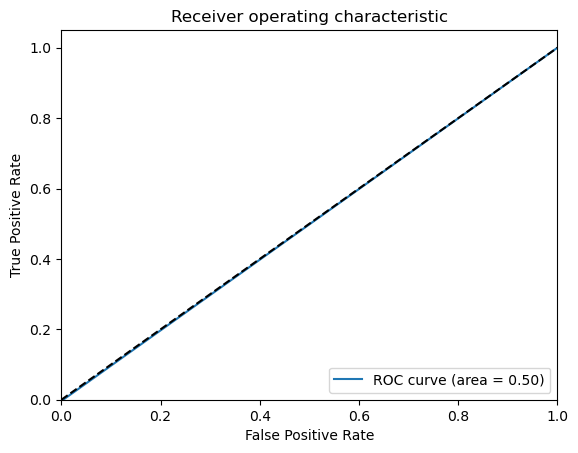

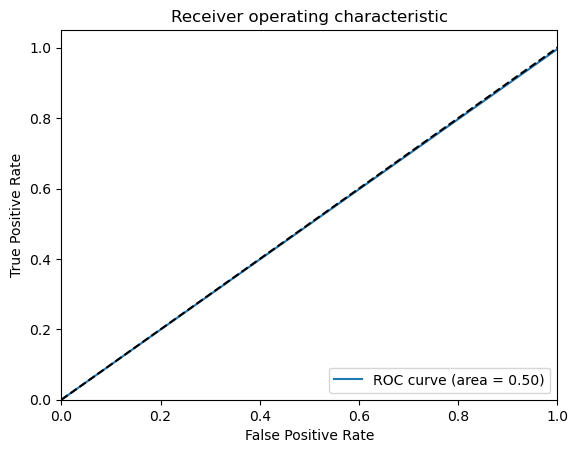

In [42]:
# Compute ROC curve and ROC area for each class for DNN Model

from sklearn.metrics import roc_curve, auc

dnny_score = dnn_model.predict(X_test) # get the prediction probabilities

dnn_fpr = dict()
dnn_tpr = dict()
dnn_roc_auc = dict()

for i in range(data_class):
    dnn_fpr[i], dnn_tpr[i], _ = roc_curve(y_test[:, i], dnny_score[:, i])
    dnn_roc_auc[i] = auc(dnn_fpr[i], dnn_tpr[i])
    
# Plot of a ROC curve for a specific class

for i in range(data_class):
    plt.figure()
    plt.plot(dnn_fpr[i], dnn_tpr[i], label='ROC curve (area = %0.2f)' % dnn_roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

# # 4.3 ROC Curve 

The ROC curve is a plot of the true positive rate (recall) against the false positive rate (TN / (TN+FP)). AUC-ROC stands for Area Under the Receiver Operating Characteristics, and the higher the area, the better the model's performance. In our research the ROC curve for CNN is 83% while that of DNN is 50% which means the CNN is a better model performer than the DNN

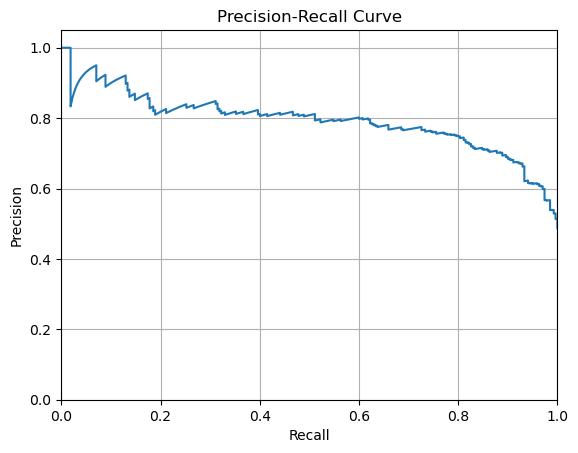

In [43]:
# PR Curve for CNN

from sklearn.metrics import precision_recall_curve

# Compute precision and recall values
precision, recall, _ = precision_recall_curve(y_test[:, i], y_score[:, i])

# Plot the PR curve

plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.grid(True)
plt.show()

18/18 [==============================] - 0s 3ms/step


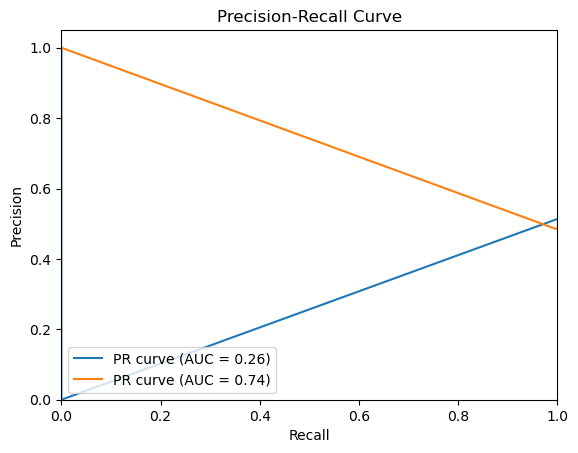

In [44]:
# PR Curve for DNN


from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

dnny_score = dnn_model.predict(X_test)  # get the prediction probabilities

precision = dict()
recall = dict()
pr_auc = dict()

for i in range(data_class):
    p, r, _ = precision_recall_curve(y_test[:, i], dnny_score[:, i])
    pr_auc[i] = auc(r, p)
    precision[i] = p
    recall[i] = r

plt.figure()
for i in range(data_class):
    plt.plot(recall[i], precision[i], label='PR curve (AUC = %0.2f)' % pr_auc[i])

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

# 4.4 PR Curve

The tradeoff between precision and recall for various thresholds is depicted by the precision-recall curve. High precision corresponds to a low false positive rate, and high recall corresponds to a low false negative rate, resulting in a high area under the curve, which signifies both high recall and high precision. CNN performs better in this scenario. 

# 4.5 Conclusion

Overall, the CNN model outperforms both classes in terms of precision, ROC curve, and PR curve. But when the F1-score is taken into account, the DNN model performs better for the "Cancer" class. It's significant to note that the DNN model performs poorly in correctly classifying samples of the "no cancer" class, as evidenced by its low F1-score for that class. To improve the performance of both models, more research and development are required.